In [3]:
import numpy as np
import matplotlib.pyplot as plt
from NumOpt.backtracking import backtracking
from NumOpt.functions import beanFunction

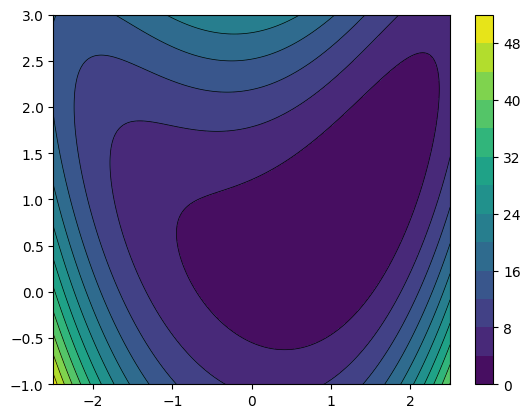

In [6]:
N = 200
x1 = np.linspace(-2.5, 2.5, N)
x2 = np.linspace(-1, 3, N)
X1, X2 = np.meshgrid(x1, x2, indexing='ij')
F = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        F[i, j] = beanFunction([X1[i, j], X2[i, j]])
        
Nlev = 15
plt.contourf(X1, X2, F, levels=Nlev, cmap='viridis')
plt.colorbar()
plt.contour(X1, X2, F, levels=Nlev, colors='k', linewidths=0.5)


In [18]:
xmin, xhist = backtracking(beanFunction, x0=[-1.0, 2.0], tol=1e-6, maxIter=5000, alpha0=1.0)

Text(0.5, 1.0, 'Number of iterations: 33')

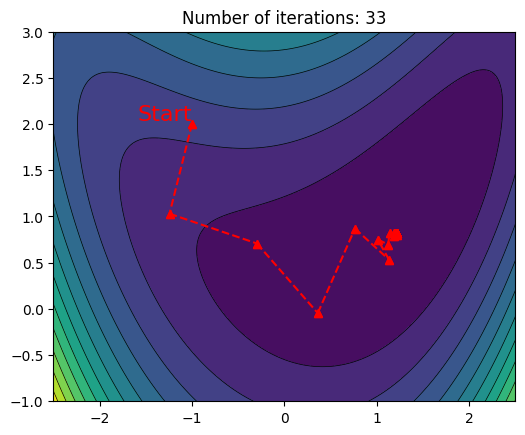

In [22]:
plt.contourf(X1, X2, F, levels=Nlev, cmap='viridis')
plt.contour(X1, X2, F, levels=Nlev, colors='k', linewidths=0.5)

ls = 'r--^'

for ix in range(len(xhist)):
    xcurr = xhist[ix]
    if ix == 0:
        plt.plot(xcurr[0], xcurr[1], ls)
        plt.text(xcurr[0], xcurr[1], 'Start', color='red', fontsize=16, verticalalignment='bottom', horizontalalignment='right')
    else:
        xprev = xhist[ix - 1]
        plt.plot([xprev[0], xcurr[0]], [xprev[1], xcurr[1]], ls)
    
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Number of iterations: {}'.format(len(xhist)-1))

